In [58]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
import random
%matplotlib inline

In [3]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
6,2732,4,135.0
16,1180,3,48.0
2,1440,3,62.0
5,1170,2,38.0
1,2600,4,120.0


In [4]:
df["price"].values.reshape(df.shape[0],1).shape


(20, 1)

In [5]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x_scaled = sx.fit_transform(df.drop("price",axis=1))
y_scaled = sy.fit_transform(df["price"].values.reshape(df.shape[0],1))

print("Scaled X = \n",x_scaled)
print("Scaled Y = \n",y_scaled)

Scaled X = 
 [[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]
 [0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]
 [0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]
 [0.67931034 0.5       ]
 [0.         0.        ]]
Scaled Y = 
 [[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


In [6]:
len(y_scaled)

20

#### We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D


In [7]:
y_scaled = y_scaled.ravel()
y_scaled.shape

(20,)

In [8]:
x_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [96]:
def adagrad_gradient_descent(x, y_true, epochs, learning_rate = 0.1):
    num_features = x.shape[1]
    thetas = np.zeros(shape = (num_features))
    vt = np.zeros(shape = (num_features))
    Nobservations = x.shape[0]   # num of rows in X
    cost_list = []
    epochs_list = []
    theta_1 = []
    theta_2 = []
    hypothesis = []
    for i in range(epochs):
        
        if i > 2 :
            if abs(cost_list[-2] - cost_list[-1]) <= 0.001 :
                break
        
        # Calculate Y predected
        y_predict = np.dot( thetas , x.T )
        # Getting the gradient with current thetas values
        thetas_grad = (2/Nobservations)*(x.T.dot(y_predict - y_true))
        # Calculate Vt 
        vt = vt + np.square(thetas_grad)
        # Updating thetas values
        thetas = thetas - ( (learning_rate / (np.sqrt(vt) + 1e-8)) * thetas_grad)
        # Calculate the cost value 
        cost = np.mean(np.square(y_predict - y_true))
        
        cost_list.append(cost)
        epochs_list.append(i)
        theta_1.append(thetas[0])
        theta_2.append(thetas[1])
            
    hypothesis.append(y_predict)
    
    return thetas, theta_1, theta_2, cost, cost_list, epochs_list, hypothesis
        
        


In [97]:
ADG_the_ta, ADG_the_ta_1, ADG_the_ta_2, ADG_cost, ADG_cost_list, ADG_epoch_list, ADG_Hypoth_esis= adagrad_gradient_descent(x_scaled,y_scaled,600)
ADG_the_ta, ADG_cost


(array([0.43713284, 0.40862327]), 0.013585049606614902)

In [98]:
ADG_Hypoth_esis

[array([0.13879304, 0.56917774, 0.29653784, 0.30853076, 0.16011378,
        0.15567195, 0.58872175, 0.67282023, 0.27728995, 0.832934  ,
        0.34983969, 0.59656897, 0.13050164, 0.14530771, 0.416467  ,
        0.15641226, 0.25804206, 0.31134391, 0.49345856, 0.        ])]

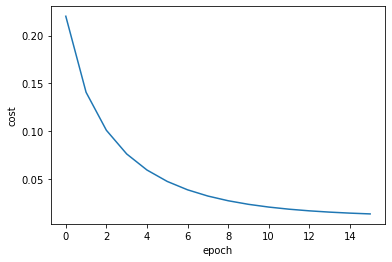

In [99]:

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(ADG_epoch_list,ADG_cost_list)


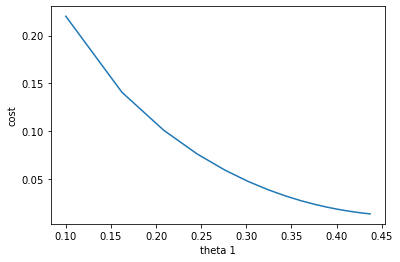

In [100]:

plt.xlabel("theta 1")
plt.ylabel("cost")
plt.plot(ADG_the_ta_1,ADG_cost_list)


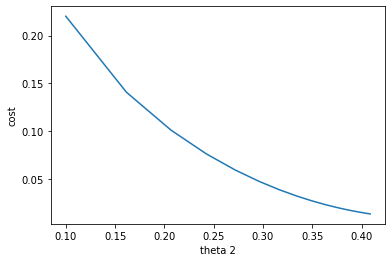

In [101]:

plt.xlabel("theta 2")
plt.ylabel("cost")
plt.plot(ADG_the_ta_2,ADG_cost_list)

In [102]:
def predict(area, bedroom, theta):
    
    scaled_x = sx.transform([[area,bedroom]])[0]
    scaled_price = theta[0]* scaled_x[0] + theta[1]* scaled_x[1]
    
    return sy.inverse_transform([[scaled_price]])
    

In [103]:
predict(800,1,ADG_the_ta)

array([[32.]])

## Getting prediction values using Hypothesis values 

In [104]:
y_hat_ADG = []
for i in ADG_Hypoth_esis:
    y_hat_ADG.append(sy.inverse_transform([i]))
    

In [105]:
# Check the 1D-dimention y_hat

y_hat_ADG[0][0]

array([ 50.73705982, 108.83899527,  72.03260842,  73.6516521 ,
        53.6153597 ,  53.01571389, 111.47743682, 122.8307308 ,
        69.43414325, 144.4460905 ,  79.22835812, 112.53681109,
        49.61772098,  51.61654034,  88.22304525,  53.11565486,
        66.83567808,  74.03142778,  98.61690593,  32.        ])

In [106]:

r2_score(df.price, y_hat_ADG[0][0]) 

0.8639142030225119

# RMSProp

In [203]:
def RMSProp_adagrad_gradient_descent(x, y_true, epochs, learning_rate = 0.03 , Bita = 0.4):
    num_features = x.shape[1]
    thetas = np.zeros(shape = (num_features))
    vt = np.zeros(shape = (num_features))
    Nobservations = x.shape[0]   # num of rows in X
    cost_list = []
    epochs_list = []
    theta_1 = []
    theta_2 = []
    hypothesis = []
    for i in range(epochs):
        
        if i > 2 :
            if abs(cost_list[-2] - cost_list[-1]) <= 0.0001 :
                break
        
        # Calculate Y predected
        y_predict = np.dot( thetas , x.T )
        # Getting the gradient with current thetas values
        thetas_grad = (2/Nobservations)*(x.T.dot(y_predict - y_true))
        # Calculate Vt 
        vt = (Bita * vt) + ((1 - Bita) * np.square(thetas_grad))
        # Updating thetas values
        thetas = thetas - ( (learning_rate / (np.sqrt(vt) + 1e-8)) * thetas_grad)
        # Calculate the cost value 
        cost = np.mean(np.square(y_predict - y_true))
        
        cost_list.append(cost)
        epochs_list.append(i)
        theta_1.append(thetas[0])
        theta_2.append(thetas[1])
            
    hypothesis.append(y_predict)
    
    return thetas, theta_1, theta_2, cost, cost_list, epochs_list, hypothesis
        
        


In [214]:
RMS_the_ta, RMS_the_ta_1, RMS_the_ta_2, RMS_cost, RMS_cost_list, RMS_epoch_list, RMS_Hypothesis= RMSProp_adagrad_gradient_descent(x_scaled,y_scaled,150)
RMS_the_ta, RMS_cost


(array([0.82392831, 0.13921047]), 0.0048072616521416586)

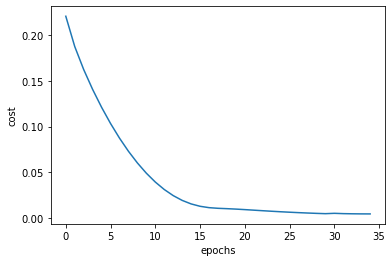

In [215]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(RMS_epoch_list,RMS_cost_list)

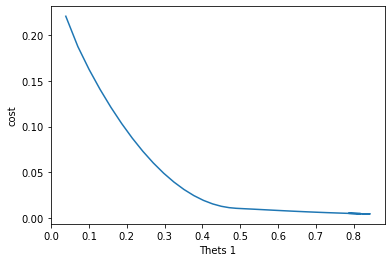

In [216]:
plt.xlabel("Thets 1")
plt.ylabel("cost")
plt.plot(RMS_the_ta_1,RMS_cost_list)

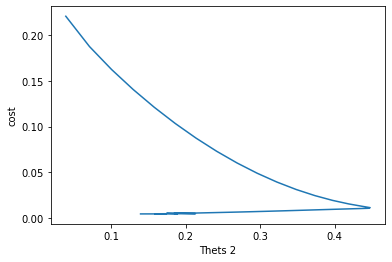

In [217]:
plt.xlabel("Thets 2")
plt.ylabel("cost")
plt.plot(RMS_the_ta_2,RMS_cost_list)

In [218]:
RMS_Hypothesis

[array([0.11805018, 0.65449439, 0.27335232, 0.29692581, 0.15995863,
        0.1512277 , 0.69291046, 0.85821599, 0.2355183 , 1.01817462,
        0.37812342, 0.7083351 , 0.10175246, 0.13085554, 0.50908731,
        0.15268285, 0.19768429, 0.3024554 , 0.66042335, 0.        ])]

In [219]:
def predict(area, bedroom, theta):
    
    scaled_x = sx.transform([[area,bedroom]])[0]
    scaled_price = theta[0]* scaled_x[0] + theta[1]* scaled_x[1]
    
    return sy.inverse_transform([[scaled_price]])
    

In [220]:
predict(800,1,RMS_the_ta)

array([[32.]])

## Getting prediction values using Hypothesis values 

In [221]:
y_hat_RMS = []
for i in RMS_Hypothesis:
    y_hat_RMS.append(sy.inverse_transform([i]))
    

In [222]:
# Check the 1D-dimention y_hat

y_hat_RMS[0][0]

array([ 47.93677472, 120.3567428 ,  68.90256261,  72.08498501,
        53.59441453,  52.41573957, 125.54291263, 147.85915854,
        63.79497112, 169.45357307,  83.04666213, 127.62523839,
        45.73658147,  49.665498  , 100.72678654,  52.6121854 ,
        58.68737963,  72.83147915, 121.15715251,  32.        ])

In [223]:

r2_score(df.price, y_hat_RMS[0][0]) 

0.9518441189281732